In [1]:
DATA = '.'

### Load files
- WEB_PAGE_DATA_CSV = DATA / 'web_page_data.csv'
- FOUR_SESSIONS_CSV = DATA / 'four_sessions.csv'
- CLICK_RATE_CSV = DATA / 'click_rates.csv'
- IMANISHI_CSV = DATA / 'imanishi_data.csv'

In [2]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import random

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 👩🏻‍ Web page session data

### ✅ session time - 실수 값

In [5]:
WEB_PAGE_DATA_CSV = DATA + '/web_page_data.csv'
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.Time = 100 * session_times.Time
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


Text(0.5, 0.98, '')

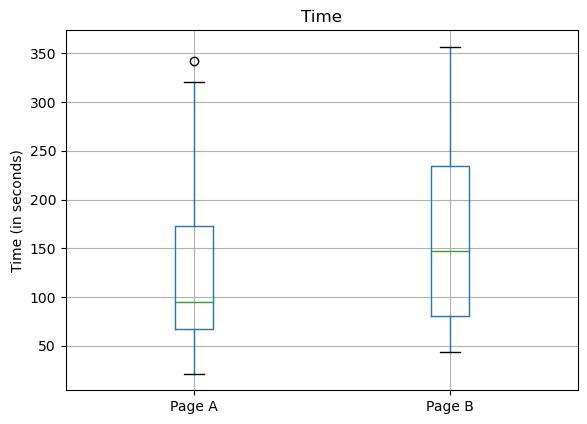

In [6]:
ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

In [7]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
mean_b - mean_a

35.66666666666667

In [8]:
set(range(10))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
# Permutation test 
## 한 번의 검정 통계량(평균 차이) 얻는 함수 
def perm_fun(x, nA, nB): # x: series. 칼럼 하나 
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    # index array를 set으로 바로 주면 에러 메시지뜸
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean() # series.loc[] -> 특정 행에 해당하는 데이터만 가져옴 

Text(0, 0.5, 'Frequency')

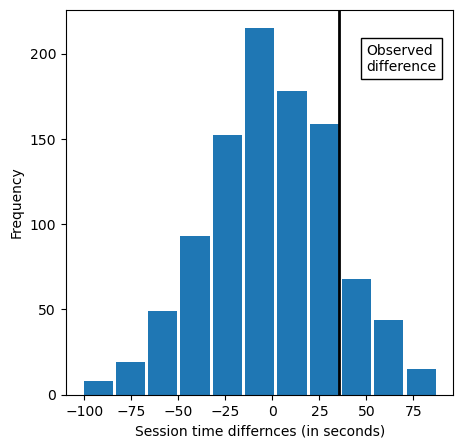

In [17]:
nA, nB = 21, 15
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=mean_b - mean_a, color='black', lw=2) # axv: axis vertical. 축에 수직선을 그린다. lw:linewidth
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'}) # textbox 위치할 x,y 좌표. bounding box
ax.set_xlabel('Session time differnces (in seconds)')
ax.set_ylabel('Frequency')

In [19]:
# 우연하게 실제 그룹차이보다 더 큰 차이를 보일 확률
np.mean(np.array(perm_diffs) > (mean_b-mean_a)) # np.array로 안 감싸고 바로 list 넘기면 에러남 

0.131

#### ✅ 전환율 - binary
- 0,1로 이루어진 vector에서 평균 내면 전환율

In [3]:
obs_pct_diff = 100 * (200/23739 - 182/22588)
obs_pct_diff

0.03675791182059275

In [4]:
conversion = [0] * 45945 + [1] * 382

In [7]:
conversion[0], conversion[-1]

(0, 1)

In [8]:
conversion = pd.Series(conversion)
conversion

0        0
1        0
2        0
3        0
4        0
        ..
46322    1
46323    1
46324    1
46325    1
46326    1
Length: 46327, dtype: int64

In [11]:
# permutation test statistics(in percent) 1000개 얻기 
perm_diffs = [100 * perm_fun(conversion, 23739, len(conversion)-23739) for _ in range(1000)] # 첫번째 파라미터 x: series. 칼럼 하나 

Text(0.06, 200, 'Observed\ndifference')

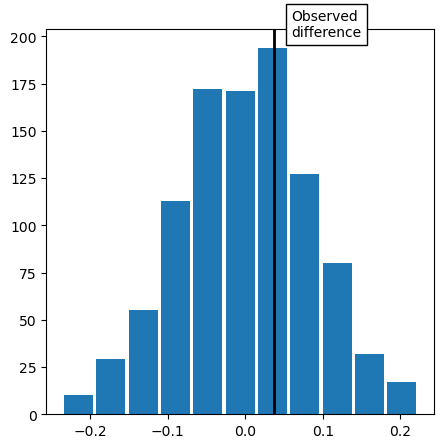

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})

In [13]:
# p값
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.327

In [16]:
# 가설이 이항분포를 따르기 때문에 p값을 permutation test 없이 근사하는 방법
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

In [18]:
p_value/2 # default가 양방향 검증이라서 

0.34977973135733076

In [19]:
stats.chi2_contingency(survivors)

Chi2ContingencyResult(statistic=0.14893055235461503, pvalue=0.6995594627146615, dof=1, expected_freq=array([[  195.74541844, 23543.25458156],
       [  186.25458156, 22401.74541844]]))

### 🍺 T-test

In [3]:
WEB_PAGE_DATA_CSV = DATA + '/web_page_data.csv'
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.Time = 100 * session_times.Time

In [5]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, session_times[session_times.Page == 'Page B'].Time, equal_var=False)

In [6]:
res

TtestResult(statistic=-1.098315562363811, pvalue=0.28152437245700634, df=27.693370059531322)

In [7]:
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


## 🌠 ANOVA

In [3]:
FOUR_SESSIONS_CSV = DATA  + '/four_sessions.csv'
four_sessions = pd.read_csv(FOUR_SESSIONS_CSV)

In [5]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]

###### 함수 print

In [7]:
four_sessions.groupby('Page').mean().var(), observed_variance

(Time    55.426667
 dtype: float64,
 55.426666666666655)

In [9]:
four_sessions.groupby('Page').mean()

,Time
Page,
Page 1,172.8
Page 2,182.6
Page 3,175.6
Page 4,164.6


In [10]:
four_sessions.groupby('Page').mean().values

array([[172.8],
       [182.6],
       [175.6],
       [164.6]])

In [11]:
type(four_sessions.groupby('Page').mean().values)

numpy.ndarray

###### done

In [8]:
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())

Observed means: [172.8 182.6 175.6 164.6]


In [12]:
print('Variance:', observed_variance)

Variance: 55.426666666666655


In [13]:
def perm_test(df):
    df = df.copy() # 함수 들어와서 scope 내에서 변수가 할당됨. 함수 밖에서 파라미터로 보내진 데이터프레임에는 영향 없음 
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]

In [14]:
perm_variance = [perm_test(four_sessions) for _ in range(3000)]

In [15]:
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

Pr(Prob) 0.08566666666666667


In [16]:
[var > observed_variance for var in perm_variance[1:10]]

[False, False, False, False, False, False, False, False, False]

#### F-statistics

In [5]:
import statsmodels.formula.api as smf
model = smf.ols('Time ~ Page', data = four_sessions).fit()

In [7]:
import statsmodels.api as sm
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


### 👨🏻‍🎤Chi-square statistics

In [4]:
click_rate = pd.read_csv(DATA + '/click_rates.csv')
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
print(clicks)

Headline  Headline A  Headline B  Headline C
Click                                       
Click             14           8          12
No-click         986         992         988


In [5]:
clicks.values # observed. list of list. 

array([[ 14,   8,  12],
       [986, 992, 988]])

In [6]:
box = [1] * 34 + [0] * 2966
random.shuffle(box)

In [7]:
def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        for observe in row: 
            cur_residu = (observe-expect) ** 2 / expect
            pearson_residuals.append(cur_residu)
    return np.sum(pearson_residuals)

In [8]:
expected_clicks = 34 / 3 
expected_noclicks= 1000 - expected_clicks

In [9]:
observed = clicks.values
expected = [expected_clicks, expected_noclicks]
chi2observed = chi2(observed, expected)
chi2observed

1.6659394708658917

In [18]:
def permutation_function(box):
    sample_clicks = [sum(random.sample(box, 1000)), sum(random.sample(box, 1000)),sum(random.sample(box, 1000))]
    sample_noclicks = [1000-click for click in sample_clicks]
    perm_chi2 = chi2([sample_clicks, sample_noclicks], expected)
    return perm_chi2

In [19]:
perm_chi2 = [permutation_function(box) for _ in range(2000)] # R에서 (based on 2000 replicates)

In [20]:
resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4835


In [10]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


### 👛 Sample size 결정

In [5]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
effect_size

0.01029785095103608

In [7]:
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 116602.393
